In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import ast
from scipy import stats
import scipy.stats as ss
import scipy.special as special

In [2]:
df = pd.read_csv('./yelp_dataset/resturants_cleaned.csv')

In [3]:
df.head()

,business_id,name,city,state,review_count,is_open,Cursine,BusinessAcceptsBitcoin,OutdoorSeating,Smoking,...,upscale,divey,OpenMusic,brunch,dinner,breakfast,latenight,lunch,dessert,star_type
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,71,6,5,1,5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Z7r_FJXEyfyvVsyv2y7gFQ,Cactus Grill,71,6,60,1,44,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,VHsNB3pdGVcRgs6C3jt6Zg,Dublin O'Neil's,71,6,130,0,35,0,1,0,...,0,0,0,0,1,0,0,1,0,1
3,ZMcbVIEXsLO7j1Q1GXKPSw,A-Ri-Rang,71,6,60,1,38,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,-fiUXzkxRfbHY9TKWwuptw,DESTIHL Restaurant & Brew Works,71,6,712,1,2,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [4]:
df.shape

(23284, 54)

In [5]:
df.is_open.value_counts()

1    16818
0     6466
Name: is_open, dtype: int64

In [6]:
df[df.is_open == 1].star_type.value_counts()

1    14107
0     2711
Name: star_type, dtype: int64

In [7]:
df[df.is_open == 0].star_type.value_counts()

1    5340
0    1126
Name: star_type, dtype: int64

In [8]:
target = df['is_open']

In [9]:
columns = [column for column in list(df.columns) if column not in ['business_id', 'name', 'is_open']]
print(columns)

['city', 'state', 'review_count', 'Cursine', 'BusinessAcceptsBitcoin', 'OutdoorSeating', 'Smoking', 'BYOBCorkage', 'BikeParking', 'WiFi', 'Caters', 'GoodForDancing', 'RestaurantsGoodForGroups', 'Alcohol', 'RestaurantsTableService', 'AgesAllowed', 'HasTV', 'RestaurantsTakeOut', 'DogsAllowed', 'HappyHour', 'RestaurantsReservations', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'Corkage', 'CoatCheck', 'WheelchairAccessible', 'GoodForKids', 'RestaurantsPriceRange2', 'NoiseLevel', 'DriveThru', 'RestaurantsAttire', 'open_weekend', 'open_count', 'Parking', 'hipster', 'trendy', 'intimate', 'romantic', 'touristy', 'casual', 'classy', 'upscale', 'divey', 'OpenMusic', 'brunch', 'dinner', 'breakfast', 'latenight', 'lunch', 'dessert', 'star_type']


In [10]:
#https://numpy.org/doc/stable/reference/generated/numpy.cov.html
cov_dict = {}
for column in columns:
    cov_dict[column] = np.cov(df[column], target)[0][1]
    print(column, cov_dict[column])

city -2.6821901867392097
state 0.021444991104316545
review_count 18.04224649899985
Cursine -0.026895556517553872
BusinessAcceptsBitcoin 3.3313573182648674e-05
OutdoorSeating -0.003889007349446466
Smoking 0.002641017443599332
BYOBCorkage 0.0007926527567335966
BikeParking -0.010036202741698978
WiFi -0.008715015205119012
Caters -0.015518805261195246
GoodForDancing -0.0004279742728903137
RestaurantsGoodForGroups -0.002782067038670444
Alcohol 0.005770855313189876
RestaurantsTableService 0.024930443066907847
AgesAllowed -3.0904518554933355e-05
HasTV 0.034704512627109656
RestaurantsTakeOut 0.003932307616162389
DogsAllowed 0.0031993647356149623
HappyHour 0.009103459584692383
RestaurantsReservations -0.020781464413470854
BusinessAcceptsCreditCards 1.281262897710503e-05
RestaurantsDelivery 0.022528065910672187
Corkage 0.0003383670326872867
CoatCheck 0.0002546403944392034
WheelchairAccessible -0.002054351769773069
GoodForKids 0.01307418664173229
RestaurantsPriceRange2 -0.016386467051145923
NoiseL

In [11]:
#however, some variable is considered as continous e.g., open_count, review_count
#https://stats.stackexchange.com/questions/385610/analytical-solution-to-the-covariance-between-a-continuous-and-a-categorical-var

In [12]:
#https://stackoverflow.com/questions/15317822/calculating-covariance-with-python-and-numpy/39098306
#this will give the same value as np.cov(a, b) but it's much slower
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum = ((a - a_mean) * (b - b_mean)).sum()

    return sum/(len(a)-1)

In [13]:
#too slow to run - use np.cov()
# cov_dict2 = {}
# for column in columns:
#     cov_dict2[column] = cov(df[column], target)
#     print(column, cov_dict[column])

Find Correlation https://www.andrews.edu/~calkins/math/edrm611/edrm13.htm

## Point Biserial Correlation

In [14]:
#X: Numerical Quantitative, Y: Nominal
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html
quan_dict = {}
quan_columns = ['open_count', 'review_count']
for column in quan_columns:
    quan_dict[column] = stats.pointbiserialr(df[column],target)
    print(column, quan_dict[column])

open_count PointbiserialrResult(correlation=-0.08565393134852245, pvalue=3.592554170974775e-39)
review_count PointbiserialrResult(correlation=0.15282505224522214, pvalue=1.138070721504263e-121)


In [15]:
#Point Biserial Correlation
#https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1
#X: Numerical Quantitative, Y: Nominal
#X = open_count, review_count
quan_columns = ['open_count', 'review_count', 'is_open']
df_pbc = df[quan_columns]
df_pbc.is_open = df_pbc.is_open.astype(int)
df_pbc.corr()

/Users/TinyJiew/opt/anaconda3/envs/learnPython/lib/python3.8/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,open_count,review_count,is_open
open_count,1.000000,0.146481,-0.085654
review_count,0.146481,1.000000,0.152825
is_open,-0.085654,0.152825,1.000000


## Rank based Correlations
- https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/rank_correlations
- The two main correlations used for comparing such ranked data are known as the Spearman Rank Correlation (Spearman's ρ or Spearman's Rho) and Kendall's Tau (τ).
- Gary Strangman's library in SciPy gives Kendall's tb which has the standard tie correction included (and it calculates the two-tailed p-value):

In [16]:
#Rank Biserial Correlation
#Kendall's Tau
#X: Ordinal, Y: Nominal

kendalltau = stats.kendalltau(df['RestaurantsPriceRange2'],target)
kendalltau

KendalltauResult(correlation=-0.05605592176119059, pvalue=1.2296768607638745e-18)

In [17]:
#Cramér's V
#https://www.andrews.edu/~calkins/math/edrm611/edrm13.htm
#https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
#
#X: Nominal, Y: Nominal

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [18]:
nominal_dict = {}
non_nominal_columns = ['business_id', 'name','open_count', 'review_count', 'is_open', 'RestaurantsPriceRange2']
nominal_columns = [column for column in list(df.columns) if column not in non_nominal_columns]
for column in nominal_columns:
    nominal_dict[column] = cramers_v(df[column],target)
    print(column, nominal_dict[column])

city 0.08953295724321178
state 0.051368627959938205
Cursine 0.09349891620347965
BusinessAcceptsBitcoin 0.0
OutdoorSeating 0.016348466645549547
Smoking 0.02655651648909981
BYOBCorkage 0.013288026114261995
BikeParking 0.05733497071393457
WiFi 0.037551157156094125
Caters 0.07403912230603386
GoodForDancing 0.0055508432297652855
RestaurantsGoodForGroups 0.019933311139369476
Alcohol 0.05686229618807018
RestaurantsTableService 0.11743161970161436
AgesAllowed 0.0
HasTV 0.18309109540393478
RestaurantsTakeOut 0.0354173086258125
DogsAllowed 0.037305123563801786
HappyHour 0.04914910312447499
RestaurantsReservations 0.09254072795532868
BusinessAcceptsCreditCards 0.0
RestaurantsDelivery 0.10428451154726734
Corkage 0.006388466418299156
CoatCheck 0.0
WheelchairAccessible 0.02482401487753848
GoodForKids 0.07804453884175445
NoiseLevel 0.11128104896885746
DriveThru 0.05279754840623242
RestaurantsAttire 0.06906621763512963
open_weekend 0.04057738439876088
Parking 0.024908026705802094
hipster 0.0
trendy 0.

One is called Pearson's contingency coefficient and is termed C whereas the second is called Cramer's V coefficient. Both utilize the chi-square statistic so will be deferred into the next lesson. However, the Goodman and Kruskal lambda coefficient does not, but is another commonly used association measure. There are two flavors, one called symmetric when the researcher does not specify which variable is the dependent variable and one called asymmetric which is used when such a designation is made. We leave the details to any good statistics book.

In [19]:
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
#This valuable information is lost when using Cramer’s V due to its symmetry, 
#so to preserve it we need an asymmetric measure of association between categorical features.

#code from https://www.kaggle.com/akshay22071995/alone-in-the-woods-using-theil-s-u-for-survival
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [20]:
theil_u_dict = {}
non_nominal_columns = ['business_id', 'name','open_count', 'review_count', 'is_open', 'RestaurantsPriceRange2']
nominal_columns = [column for column in list(df.columns) if column not in non_nominal_columns]
for column in nominal_columns:
    theil_u_dict[column] = theil_u(df[column],target)
    print(column, theil_u_dict[column])

city 0.00466959716168176
state 0.0008860714343969516
Cursine 0.0020097795939057906
BusinessAcceptsBitcoin 0.00025339038424080035
OutdoorSeating 0.00023225373378208926
Smoking 0.002766257168815644
BYOBCorkage 0.0015354460664120846
BikeParking 0.0036281042845749184
WiFi 0.0010561712568457227
Caters 0.0045317022466074665
GoodForDancing 0.0006438676208536035
RestaurantsGoodForGroups 0.0007247908361190952
Alcohol 0.0016407895676424048
RestaurantsTableService 0.011210067897721858
AgesAllowed 0.007587702661573024
HasTV 0.02929152351533646
RestaurantsTakeOut 0.00269257628137601
DogsAllowed 0.005008711879472303
HappyHour 0.002450371448250505
RestaurantsReservations 0.00623075671591484
BusinessAcceptsCreditCards 5.681001976072725e-07
RestaurantsDelivery 0.00855582562279988
Corkage 0.0013608739485227814
CoatCheck 0.00037553390417523696
WheelchairAccessible 0.002484400327704269
GoodForKids 0.006576755951125067
NoiseLevel 0.007806203123570819
DriveThru 0.026063048557934697
RestaurantsAttire 0.00668

In [21]:
p_value_theil_u_dict = {}
n = df.shape[0]
for column in theil_u_dict.keys():
    r = theil_u_dict.get(column)
    ab = n/2 - 1
    p_value_theil_u_dict[column] = 2*special.btdtr(ab, ab, 0.5*(1 - abs(np.float64(r))))
    print(column, p_value_theil_u_dict[column])

city 0.4761527800219079
state 0.8924543357177261
Cursine 0.7591036740909555
BusinessAcceptsBitcoin 0.969159068329504
OutdoorSeating 0.9717305501042486
Smoking 0.6729637254278247
BYOBCorkage 0.8147654818111159
BikeParking 0.5798608382007084
WiFi 0.8719724448511486
Caters 0.48927449513959953
GoodForDancing 0.9217392498225413
RestaurantsGoodForGroups 0.911940998744643
Alcohol 0.8023117619735366
RestaurantsTableService 0.08717033289794843
AgesAllowed 0.2469581897624252
HasTV 7.809507216192017e-06
RestaurantsTakeOut 0.681188777316209
DogsAllowed 0.444719527728355
HappyHour 0.7084898687459548
RestaurantsReservations 0.34174891329422435
BusinessAcceptsCreditCards 0.9999308375256345
RestaurantsDelivery 0.1917242065350132
Corkage 0.8355053801729523
CoatCheck 0.9543062177521573
WheelchairAccessible 0.7046304959791568
GoodForKids 0.31561463473358997
NoiseLevel 0.2336103267599137
DriveThru 6.965897037786053e-05
RestaurantsAttire 0.3074942237977145
open_weekend 0.2218977151797522
Parking 0.93447172

In [22]:
filter_dict = {k: v for k, v in p_value_theil_u_dict.items() if v <0.05}

In [23]:
filtered_theil_u_dict = { k: theil_u_dict[k] for k in filter_dict.keys() }
print(filtered_theil_u_dict)

{'HasTV': 0.02929152351533646, 'DriveThru': 0.026063048557934697, 'classy': 0.046955276325518984, 'dinner': 0.05218883881648501, 'breakfast': 0.019053688097550415, 'lunch': 0.04592953662224447}


In [24]:
kendalltau[0]

-0.05605592176119059

In [25]:
quan_dict

{'open_count': PointbiserialrResult(correlation=-0.08565393134852245, pvalue=3.592554170974775e-39),
 'review_count': PointbiserialrResult(correlation=0.15282505224522214, pvalue=1.138070721504263e-121)}

In [26]:
correlation_dict = filtered_theil_u_dict.copy()
correlation_dict['RestaurantsPriceRange2'] = kendalltau[0]
correlation_dict['open_count'] = quan_dict.get('open_count')[0]
correlation_dict['review_count'] = quan_dict.get('review_count')[0]

In [27]:
correlation_dict

{'HasTV': 0.02929152351533646,
 'DriveThru': 0.026063048557934697,
 'classy': 0.046955276325518984,
 'dinner': 0.05218883881648501,
 'breakfast': 0.019053688097550415,
 'lunch': 0.04592953662224447,
 'RestaurantsPriceRange2': -0.05605592176119059,
 'open_count': -0.08565393134852245,
 'review_count': 0.15282505224522214}

In [28]:
dict(sorted(correlation_dict.items(), key=lambda item: item[1], reverse=True))

{'review_count': 0.15282505224522214,
 'dinner': 0.05218883881648501,
 'classy': 0.046955276325518984,
 'lunch': 0.04592953662224447,
 'HasTV': 0.02929152351533646,
 'DriveThru': 0.026063048557934697,
 'breakfast': 0.019053688097550415,
 'RestaurantsPriceRange2': -0.05605592176119059,
 'open_count': -0.08565393134852245}

In [29]:
insig_filter_dict = {k: v for k, v in p_value_theil_u_dict.items() if v >= 0.05}
insig_filtered_theil_u_dict = { k: theil_u_dict[k] for k in insig_filter_dict.keys() }

In [30]:
sorted_insig_filtered_theil_u_dict = (sorted(insig_filtered_theil_u_dict.items(), key=lambda item: item[1], reverse=True))
sorted_insig_filtered_theil_u_dict

[('latenight', 0.012561816962687157),
 ('RestaurantsTableService', 0.011210067897721858),
 ('dessert', 0.00958046055401809),
 ('RestaurantsDelivery', 0.00855582562279988),
 ('open_weekend', 0.008005346635649623),
 ('NoiseLevel', 0.007806203123570819),
 ('AgesAllowed', 0.007587702661573024),
 ('brunch', 0.007531476194152253),
 ('RestaurantsAttire', 0.006688059507096667),
 ('GoodForKids', 0.006576755951125067),
 ('RestaurantsReservations', 0.00623075671591484),
 ('casual', 0.006017947143890183),
 ('DogsAllowed', 0.005008711879472303),
 ('city', 0.00466959716168176),
 ('touristy', 0.004623085652490616),
 ('Caters', 0.0045317022466074665),
 ('BikeParking', 0.0036281042845749184),
 ('Smoking', 0.002766257168815644),
 ('RestaurantsTakeOut', 0.00269257628137601),
 ('WheelchairAccessible', 0.002484400327704269),
 ('HappyHour', 0.002450371448250505),
 ('divey', 0.002316840402423737),
 ('Cursine', 0.0020097795939057906),
 ('Alcohol', 0.0016407895676424048),
 ('upscale', 0.0016189929881103024),
 

In [31]:
df.groupby(['is_open'])['review_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_open,,,,,,,,
0,6466.0,66.524899,141.832149,3.0,12.0,29.0,72.0,5494.0
1,16818.0,156.469913,293.629886,3.0,26.0,68.0,169.0,9264.0


In [32]:
df.groupby(['is_open', 'RestaurantsPriceRange2']).size()

is_open  RestaurantsPriceRange2
0        1                          1857
         2                          3977
         3                           547
         4                            85
1        1                          5624
         2                         10064
         3                           975
         4                           155
dtype: int64

In [33]:
df.groupby(['is_open'])['open_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_open,,,,,,,,
0,6466.0,1996.014228,1596.954654,1.0,529.0,1788.0,3891.0,4385.0
1,16818.0,1695.720002,1551.798549,1.0,255.0,1540.0,2420.0,4385.0


In [34]:
len(df.state.unique())

21

In [35]:
len(df.city.unique())

491

In [36]:
len(df.Cursine.unique())

68

In [37]:
df.shape

(23284, 54)

In [38]:
df.columns

Index(['business_id', 'name', 'city', 'state', 'review_count', 'is_open',
       'Cursine', 'BusinessAcceptsBitcoin', 'OutdoorSeating', 'Smoking',
       'BYOBCorkage', 'BikeParking', 'WiFi', 'Caters', 'GoodForDancing',
       'RestaurantsGoodForGroups', 'Alcohol', 'RestaurantsTableService',
       'AgesAllowed', 'HasTV', 'RestaurantsTakeOut', 'DogsAllowed',
       'HappyHour', 'RestaurantsReservations', 'BusinessAcceptsCreditCards',
       'RestaurantsDelivery', 'Corkage', 'CoatCheck', 'WheelchairAccessible',
       'GoodForKids', 'RestaurantsPriceRange2', 'NoiseLevel', 'DriveThru',
       'RestaurantsAttire', 'open_weekend', 'open_count', 'Parking', 'hipster',
       'trendy', 'intimate', 'romantic', 'touristy', 'casual', 'classy',
       'upscale', 'divey', 'OpenMusic', 'brunch', 'dinner', 'breakfast',
       'latenight', 'lunch', 'dessert', 'star_type'],
      dtype='object')

In [39]:
len(df.city.value_counts())

491

In [40]:
len(df.state.value_counts())

21

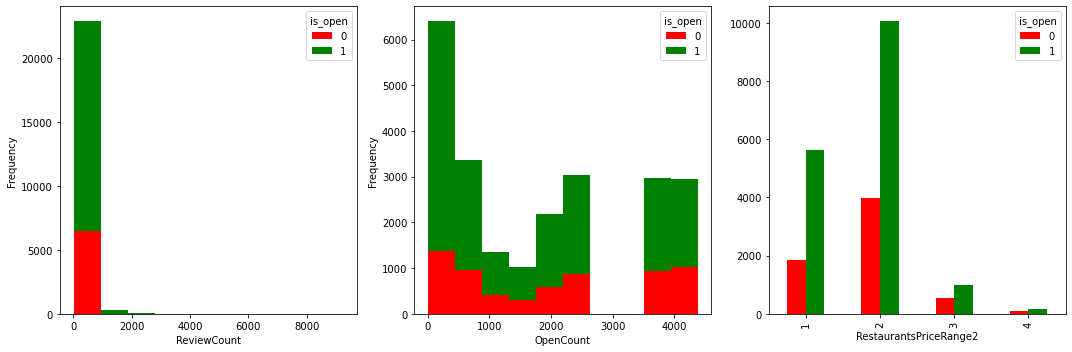

In [74]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(131)
df.pivot(columns='is_open').review_count.plot(kind = 'hist', stacked=True, ax=ax1, color = ['red', 'green'])
ax1.set_xlabel('ReviewCount')

ax2 = fig.add_subplot(132)
df.pivot(columns='is_open').open_count.plot(kind = 'hist', stacked=True, ax=ax2, color = ['red', 'green'])
ax2.set_xlabel('OpenCount')

ax3 = fig.add_subplot(133)
plt.xticks(np.arange(5))
df.groupby(['is_open']).RestaurantsPriceRange2.value_counts().unstack(0).plot.bar(ax=ax3, color = ['red', 'green'])
# df.pivot(columns='is_open').RestaurantsPriceRange2.plot(kind = 'hist', stacked=True, ax=ax3, color = ['red', 'green'])
ax3.set_xlabel('RestaurantsPriceRange2')

plt.tight_layout()
plt.show()

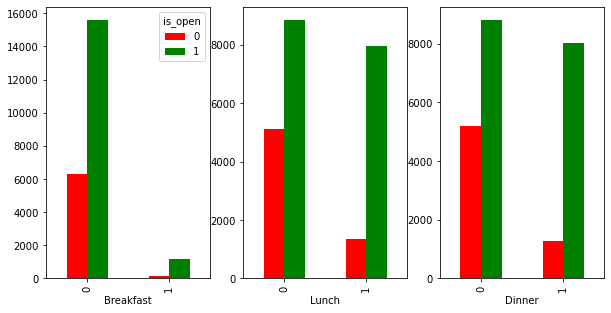

In [75]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(131)
df.groupby(['is_open']).breakfast.value_counts().unstack(0).plot.bar(ax=ax1, color = ['red', 'green'])
ax1.set_xlabel('Breakfast')

ax2 = fig.add_subplot(132)
df.groupby(['is_open']).lunch.value_counts().unstack(0).plot.bar(ax=ax2, color = ['red', 'green'])
ax2.get_legend().remove()
ax2.set_xlabel('Lunch')

ax3 = fig.add_subplot(133)
df.groupby(['is_open']).dinner.value_counts().unstack(0).plot.bar(ax=ax3, color = ['red', 'green'])
ax3.get_legend().remove()
ax3.set_xlabel('Dinner')


plt.show()

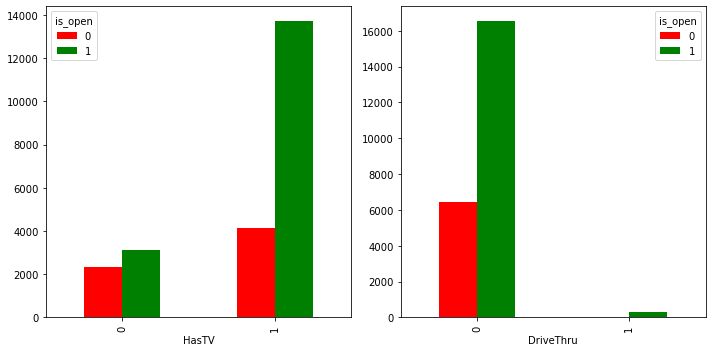

In [77]:
fig = plt.figure(figsize=(10,5))

ax4 = fig.add_subplot(121)
# plt.xticks(np.arange(2))
# df.pivot(columns='is_open').HasTV.plot(kind = 'hist', stacked=True, ax=ax4, color = ['red', 'green'])

df.groupby(['is_open']).HasTV.value_counts().unstack(0).plot.bar(ax=ax4, color = ['red', 'green'])
ax4.set_xlabel('HasTV')

ax5 = fig.add_subplot(122)
# plt.xticks(np.arange(2))
# df.pivot(columns='is_open').DriveThru.plot(kind = 'hist', stacked=True, ax=ax5, color = ['red', 'green'])

df.groupby(['is_open']).DriveThru.value_counts().unstack(0).plot.bar(ax=ax5, color = ['red', 'green'])
ax5.set_xlabel('DriveThru')

plt.tight_layout()
plt.show()

In [79]:
df.groupby(['is_open']).DriveThru.value_counts()

is_open  DriveThru
0        0             6444
         1               22
1        0            16530
         1              288
Name: DriveThru, dtype: int64